# Supervised Learning - Ensemble Modeling, Random Forest Tree, Bagging, Boosting, Stacking and Voting 

In [ ]:
# Build an ensemble model to correctly classify the user’s password strength and improve your model prediction by using GridSearchCV.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as skmet
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.ensemble import VotingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pwd_data = pd.read_excel(r"D:\360digi\DS\Sharath\Ensemble_Technique_2\handson\Datasets_ET\Ensemble_Password_Strength.xlsx")#, encoding='utf-8')#, error_bad_lines=False) 
pwd_data

,characters,characters_strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
1994,patososo2012,1
1995,sf2004824,1
1996,marco90,0
1997,jebekk1,0


In [4]:
test_str = pwd_data['characters'][0]
test_str

'kzde5577'

In [5]:
for ch in test_str:
    print(ch)

k
z
d
e
5
5
7
7


In [6]:
K=1;temp = [test_str[idx: idx + K] for idx in range(0, len(test_str), K)]
 
# conversion using map
res = list(map(lambda ele: list(ele), temp))

In [7]:
res

[['k'], ['z'], ['d'], ['e'], ['5'], ['5'], ['7'], ['7']]

In [8]:
# To create a alpha numeric columns 
alpha = 'abcdefghijklmnopqrstuvwxyz'
Alpha = alpha.upper()
num = '0123456789'
alpha_num = alpha+Alpha+num+'_'
print(alpha_num)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789_


In [9]:
colnames = [e for e in alpha_num]
len(colnames)


63

In [10]:
df = pd.DataFrame(np.zeros((1999,63)),columns=colnames)

In [11]:
#df

In [12]:
#import string
for k,test_str in enumerate(pwd_data['characters']):
    #print(k,test_str)
    for ch in str(test_str):
        #print(ch)
        if ch not in colnames:
            df.loc[k,'_'] += 1
        else:
            df.loc[k,ch] += 1

In [13]:
df[0:1]

,a,b,c,d,e,f,g,h,i,j,...,1,2,3,4,5,6,7,8,9,_
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0


In [14]:
df

,a,b,c,d,e,f,g,h,i,j,...,1,2,3,4,5,6,7,8,9,_
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1997,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### MinMaxScaler to convert the magnitude of the columns to a range of 0 to 1

In [15]:
minmaxscale = MinMaxScaler()

In [16]:
processed = minmaxscale.fit(df)

In [17]:
X_norm = pd.DataFrame(processed.transform(df))
X_norm

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.00,0.0,0.000000,0.25,0.25,0.000000,0.0,0.0,0.00,0.000000,...,0.00,0.000000,0.000000,0.0,0.5,0.000000,0.50,0.000000,0.0,0.0
1,0.00,0.0,0.000000,0.00,0.00,0.000000,0.0,0.0,0.25,0.000000,...,0.00,0.000000,0.666667,0.4,0.0,0.000000,0.00,0.000000,0.0,0.0
2,0.00,0.0,0.000000,0.00,0.00,0.000000,0.0,0.0,0.50,0.000000,...,0.25,0.000000,0.000000,0.0,0.0,0.000000,0.25,0.000000,0.0,0.0
3,0.00,0.0,0.000000,0.00,0.25,0.000000,0.5,0.0,0.00,0.000000,...,0.25,0.166667,0.333333,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
4,0.25,0.2,0.000000,0.00,0.00,0.000000,0.5,0.2,0.25,0.000000,...,0.25,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.25,0.0,0.000000,0.00,0.00,0.000000,0.0,0.0,0.00,0.000000,...,0.25,0.333333,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0
1995,0.00,0.0,0.000000,0.00,0.00,0.333333,0.0,0.0,0.00,0.000000,...,0.00,0.333333,0.000000,0.4,0.0,0.000000,0.00,0.166667,0.0,0.0
1996,0.25,0.0,0.333333,0.00,0.00,0.000000,0.0,0.0,0.00,0.000000,...,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.2,0.0
1997,0.00,0.2,0.000000,0.00,0.50,0.000000,0.0,0.0,0.00,0.333333,...,0.25,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0


In [18]:
X_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
count,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,...,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,0.160705,0.033417,0.061364,0.047899,0.107929,0.035351,0.094547,0.034317,0.094422,0.047357,...,0.138819,0.070869,0.104386,0.051526,0.059655,0.074704,0.055278,0.041854,0.057329,0.003684
std,0.196708,0.084682,0.145035,0.111526,0.161948,0.112977,0.212392,0.083486,0.144970,0.127354,...,0.174519,0.108232,0.182050,0.103427,0.132964,0.172584,0.125595,0.092387,0.118950,0.033153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.250000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
pwd_data.columns

Index(['characters', 'characters_strength'], dtype='object')

In [20]:
Y = pwd_data['characters_strength']
Y

0       1
1       1
2       1
3       1
4       1
       ..
1994    1
1995    1
1996    0
1997    0
1998    1
Name: characters_strength, Length: 1999, dtype: int64

In [21]:
# Split data into train and test with Stratified sample technique

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [22]:
X_train.shape

(1599, 63)

In [23]:
X_test.shape

(400, 63)

In [24]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 1599)
print("\n")
print(Y_test.value_counts()/ 400)

1    0.858036
0    0.141964
Name: characters_strength, dtype: float64


1    0.8575
0    0.1425
Name: characters_strength, dtype: float64


# Random Forest Model

In [25]:
rf_Model = RandomForestClassifier()

#### Hyperparameters

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2, 4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [27]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
n_estimators

[10, 17, 25, 33, 41, 48, 56, 64, 72, 80]

In [28]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


## Hyperparameter optimization with GridSearchCV

In [29]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = -1)

In [30]:
rf_Grid.fit(X_train, Y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [31]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [32]:
cv_rf_grid = rf_Grid.best_estimator_
cv_rf_grid

RandomForestClassifier(max_depth=2, max_features='auto', n_estimators=10)

## Check Accuracy

In [33]:
# Evaluation on Test Data
test_pred = cv_rf_grid.predict(X_test)

accuracy_test = np.mean(test_pred == Y_test)
accuracy_test

0.8575

[Text(0.5, 1.0, 'Password Strength Detection Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

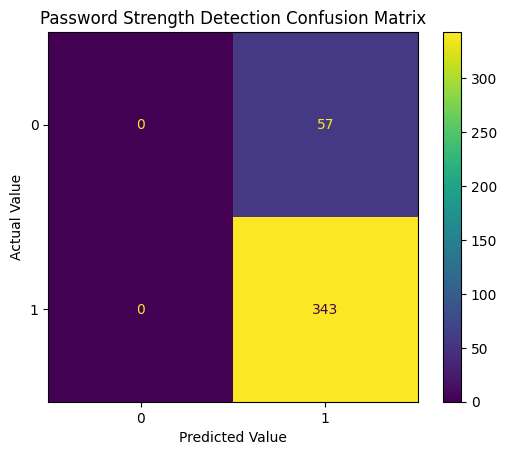

In [34]:
cm = skmet.confusion_matrix(Y_test, test_pred)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ['Yes', 'No'])
cmplot.plot()
cmplot.ax_.set(title = 'Password Strength Detection Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [35]:
print (f'Train Accuracy - : {rf_Grid.score(X_train, Y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.858
Test Accuracy - : 0.858


# Hyperparameter optimization with RandomizedSearchCV

In [36]:
rf_Random = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose = 0, n_jobs = -1)

In [37]:
rf_Random.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]})

In [38]:
rf_Random.best_params_

{'n_estimators': 56,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [39]:
cv_rf_random = rf_Random.best_estimator_
cv_rf_random

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=56)

In [40]:
# Evaluation on Test Data
test_pred_random = cv_rf_random.predict(X_test)

accuracy_test_random = np.mean(test_pred_random == Y_test)
accuracy_test_random

0.8575

[Text(0.5, 1.0, 'Password Strength Detection Confusion Matrix'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

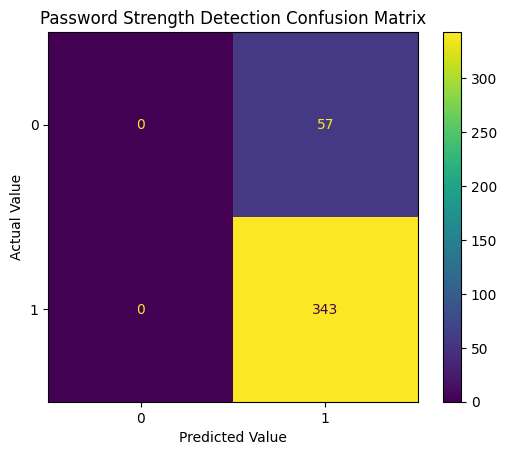

In [41]:
cm = skmet.confusion_matrix(Y_test, test_pred_random)

cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm)#, display_labels = ['Yes', 'No'])
cmplot.plot()
cmplot.ax_.set(title = 'Password Strength Detection Confusion Matrix', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [42]:
print (f'Train Accuracy - : {rf_Random.score(X_train, Y_train):.3f}')
print (f'Test Accuracy - : {rf_Random.score(X_test, Y_test):.3f}')

Train Accuracy - : 0.858
Test Accuracy - : 0.858


# Cross Validation implementation

In [43]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv = 5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X = _X,
                           y = _y,
                           cv = _cv,
                           scoring = _scoring,
                           return_train_score = True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [44]:
Random_forest_result = cross_validation(cv_rf_random, X_train, Y_train, 5)

Random_forest_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.857701,85.803631,0.857701,0.858036,1.0,1.0,0.923401,0.923595,0.859375,85.803683,0.859375,0.858037,1.0,1.0,0.924370,0.923594
1,0.857701,85.803631,0.857701,0.858036,1.0,1.0,0.923401,0.923595,0.859375,85.803683,0.859375,0.858037,1.0,1.0,0.924370,0.923594
2,0.858483,85.803631,0.858483,0.858036,1.0,1.0,0.923854,0.923595,0.856250,85.803683,0.856250,0.858037,1.0,1.0,0.922559,0.923594
3,0.858483,85.803631,0.858483,0.858036,1.0,1.0,0.923854,0.923595,0.856250,85.803683,0.856250,0.858037,1.0,1.0,0.922559,0.923594
4,0.857812,85.803631,0.857812,0.858036,1.0,1.0,0.923465,0.923595,0.858934,85.803683,0.858934,0.858037,1.0,1.0,0.924115,0.923594


In [45]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12, 6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        plt.ylim(0.40000, 1)
        plt.bar(X_axis - 0.2, train_data, 0.1, color = 'blue', label = 'Training')
        plt.bar(X_axis + 0.2, val_data, 0.1, color = 'red', label = 'Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

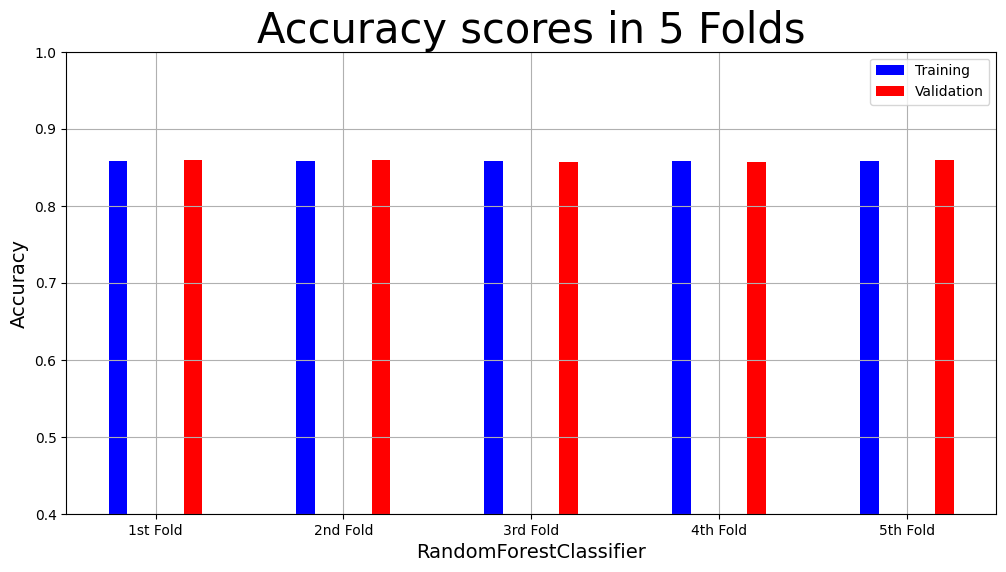

In [46]:
model_name = "RandomForestClassifier"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Random_forest_result["Training Accuracy scores"],
            Random_forest_result["Validation Accuracy scores"])

# Bagging Classifier Model

In [47]:
clftree = tree.DecisionTreeClassifier()

In [48]:
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = -1, random_state = 42)

In [49]:
# Fit the model 
n_jobs = -1
bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = -1, random_state = 42)
bagging = bag_clf.fit(X_train, Y_train)

In [50]:
print(confusion_matrix(Y_train, bagging.predict(X_train)))
print(accuracy_score(Y_train, bagging.predict(X_train)))
print('\n')
print(confusion_matrix(Y_test, bagging.predict(X_test)))
print(accuracy_score(Y_test, bagging.predict(X_test)))

[[ 227    0]
 [   0 1372]]
1.0


[[ 12  45]
 [ 12 331]]
0.8575


In [51]:
bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, random_state=42)

## Cross Validation implementation

In [52]:
from sklearn.model_selection import cross_validate

def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [53]:
Bagging_cv_scores = cross_validation(bag_clf, X_train, Y_train, 5)

Bagging_cv_scores

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.859375,86.304075,0.868590,0.874634,0.985455,0.981043,0.923339,0.924767
1,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.862500,86.304075,0.871383,0.874634,0.985455,0.981043,0.924915,0.924767
2,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.859375,86.304075,0.877888,0.874634,0.970803,0.981043,0.922010,0.924767
3,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.868750,86.304075,0.876623,0.874634,0.985401,0.981043,0.927835,0.924767
4,1.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.865204,86.304075,0.878689,0.874634,0.978102,0.981043,0.925734,0.924767


In [54]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

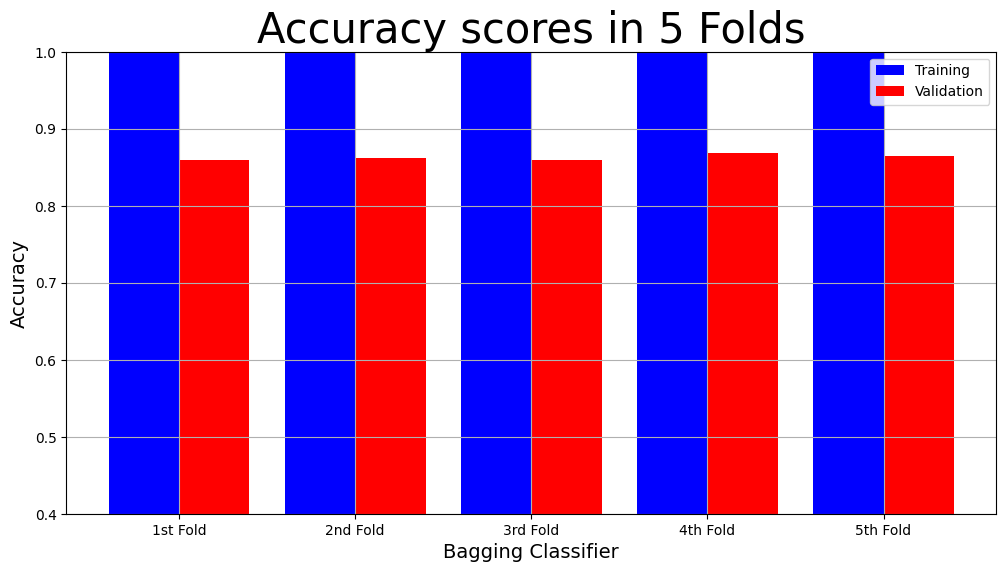

In [55]:
%matplotlib inline
model_name = "Bagging Classifier"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Bagging_cv_scores["Training Accuracy scores"],
            Bagging_cv_scores["Validation Accuracy scores"])

# AdaBoosting

In [56]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf1 = ada_clf.fit(X_train, Y_train)

In [57]:
predictions = ada_clf1.predict(X_test)

In [58]:
ada_clf1

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [59]:
# Evaluation on Testing Data
confusion_matrix(Y_test, predictions)

array([[ 18,  39],
       [  2, 341]], dtype=int64)

In [60]:
accuracy_score(Y_test, predictions)

0.8975

In [61]:
# Evaluation on Training Data
accuracy_score(Y_train, ada_clf1.predict(X_train))

0.9111944965603502

# GradientBoosting

In [62]:
boost_clf = GradientBoostingClassifier()

boost_clf1 = boost_clf.fit(X_train, Y_train)

In [63]:
grad_pred = boost_clf1.predict(X_test)

In [64]:
boost_clf1

GradientBoostingClassifier()

In [65]:
print(confusion_matrix(Y_test, grad_pred))
print(accuracy_score(Y_test, grad_pred))

[[  4  53]
 [  3 340]]
0.86


In [66]:
print(confusion_matrix(Y_train, boost_clf1.predict(X_train)))
print(accuracy_score(Y_train, boost_clf1.predict(X_train)))

[[  62  165]
 [   0 1372]]
0.8968105065666041


In [67]:
# Hyperparameters
boost_clf2 = GradientBoostingClassifier(learning_rate = 0.02, n_estimators = 1000, max_depth = 1)

In [68]:
boost_clf_p = boost_clf2.fit(X_train, Y_train)

In [69]:
grad_pred_p = boost_clf_p.predict(X_test)

In [70]:
boost_clf_p

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluation on Testing Data
print(confusion_matrix(Y_test, grad_pred_p))
print('\n')
print(accuracy_score(Y_test,grad_pred_p))

[[  0  57]
 [  0 343]]


0.8575


In [72]:
# Evaluation on Training Data
print(confusion_matrix(Y_train, boost_clf_p.predict(X_train)))
accuracy_score(Y_train, boost_clf_p.predict(X_train))

[[   0  227]
 [   0 1372]]


0.858036272670419

# XGBoosting

In [73]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 10000, 
                            learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)

In [74]:
xgb_clf1 = xgb_clf.fit(X_train, Y_train)

In [75]:
xgb_pred = xgb_clf1.predict(X_test)

In [76]:
# Evaluation on Testing Data

print(confusion_matrix(Y_test, xgb_pred))

accuracy_score(Y_test, xgb_pred)

[[ 29  28]
 [ 16 327]]


0.89

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

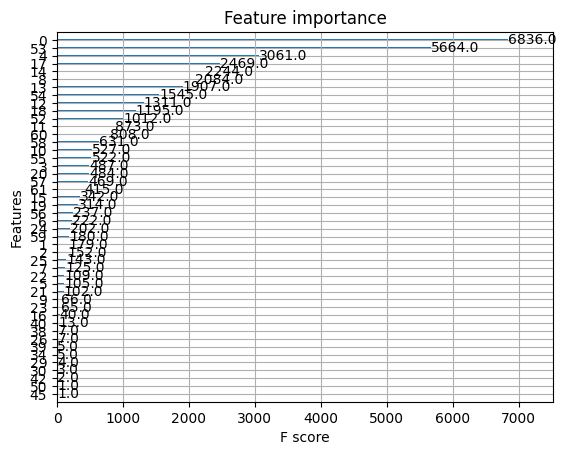

In [77]:
xgb.plot_importance(xgb_clf)

In [78]:
fi = pd.DataFrame(xgb_clf1.feature_importances_.reshape(1, -1), columns = X_train.columns)
fi

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000564,0.008031,0.007996,0.002952,0.001118,0.007345,0.005752,0.008336,0.001686,0.009955,...,0.000527,0.002464,0.005153,0.009154,0.004163,0.002256,0.01304,0.002322,0.00548,0.0


# RandomizedSearchCV for XGB

In [79]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)


In [80]:
# Grid Search
param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0.9],
               'rag_alpha': [1e-2, 0.1, 1]}


xgb_RandomGrid = RandomizedSearchCV(estimator = xgb_clf, 
                                    param_distributions = param_test1, 
                                    cv = 5, verbose = 2, n_jobs = 4)

In [81]:
Randomized_search1 = xgb_RandomGrid.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:23:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



In [82]:
cv_xg_clf = Randomized_search1.best_estimator_

cv_xg_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, rag_alpha=1, ...)

In [83]:
randomized_pred = cv_xg_clf.predict(X_test)

In [84]:
# Evaluation on Testing Data with model with hyperparameter
accuracy_score(Y_test, randomized_pred)

0.91

In [85]:
Randomized_search1.best_params_

{'subsample': 0.8,
 'rag_alpha': 1,
 'max_depth': 3,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [86]:
r_xgb = Randomized_search1.best_params_
r_xgb

{'subsample': 0.8,
 'rag_alpha': 1,
 'max_depth': 3,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [87]:
randomized_pred_1 = cv_xg_clf.predict(X_train)

In [88]:
# Evaluation on Training Data with model with hyperparameters
accuracy_score(Y_train, randomized_pred_1)

0.991869918699187

# Voting

In [ ]:
# Combine all three Voting Ensembles

In [89]:
estimators = [('rf', cv_rf_grid ), ('rand_rf', cv_rf_random), ('rand_xgb', cv_xg_clf)]
type(estimators)

list

In [90]:
# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")


In [91]:
# Fit classifier with the training data
hard_voting = ensemble_H.fit(X_train, Y_train)
hard_voting


[23:23:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=2,
                                                     max_features='auto',
                                                     n_estimators=10)),
                             ('rand_rf',
                              RandomForestClassifier(max_depth=4,
                                                     min_samples_leaf=2,
                                                     n_estimators=56)),
                             ('rand_xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=N...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, rag_alpha=1, ...))])

In [92]:
ensemble_H.score(X_test, Y_test)

0.8575

In [93]:
ensemble_S = VotingClassifier(estimators, voting = "soft")


In [94]:
soft_voting = ensemble_S.fit(X_train, Y_train)

[23:23:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "rag_alpha" } are not used.



In [95]:
soft_voting.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [96]:
ensemble_S.score(X_test, Y_test)

0.8575